In [4]:
from pamplona_weather import get_pamplona_weather_history
from datetime import datetime

years = [2013, 2014, 2015, 2016, 2017]
sanfermines_weather_history = {}

for year in years:
    sanfermines_weather_history[year] = get_pamplona_weather_history(
        start = datetime(day = 6, month = 7, year = year),
        end = datetime(day = 15, month = 7, year = year))



In [5]:
sanfermines_weather_info = {}
for year in years:
    min_temperatures = []
    max_temperatures = []
    mean_temperatures = []
    
    for day in range(6, 14+1):
        weather_info_today = [weather for weather in sanfermines_weather_history[year]
                              if weather.get_timestamp().day == day]
        
        temperatures = [weather.get_temperature() for weather in
                        weather_info_today]
        
        min_temperatures.append(min(temperatures))
        max_temperatures.append(max(temperatures))
        mean_temperatures.append(sum(temperatures) / len(temperatures))

    sanfermines_weather_info[year] =\
        (min_temperatures, max_temperatures, mean_temperatures)
    


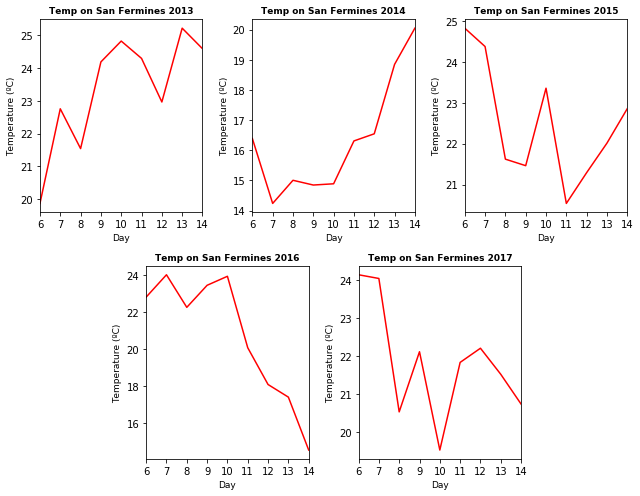

In [6]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig = plt.figure()
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = {2013:ax1, 2014:ax2, 2015:ax3, 2016:ax4, 2017:ax5}

for year in years:
    ax = axes[year]
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Day', fontsize=9)
    ax.set_ylabel('Temperature (ºC)' , fontsize=9)
    ax.set_title('Temp on San Fermines {}'.format(year), fontsize=9, fontweight='bold')

    min_temperatures, max_temperatures, mean_temperatures = \
        sanfermines_weather_info[year]
    frame = pd.DataFrame()
    frame['temperature'] = mean_temperatures
    plot = frame.plot.line(ax = ax, color = 'red', legend = None,
                           figsize = (9, 7),
                           xticks = range(0, 9))
    plot.xaxis.set_major_formatter(ticker.FixedFormatter(range(6,14+1)))

fig.tight_layout()

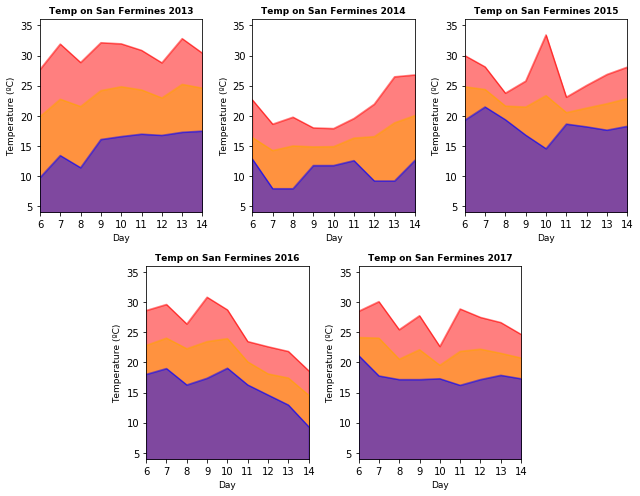

In [18]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig = plt.figure()
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = {2013:ax1, 2014:ax2, 2015:ax3, 2016:ax4, 2017:ax5}

for year in years:
    ax = axes[year]
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Day', fontsize=9)
    ax.set_ylabel('Temperature (ºC)' , fontsize=9)
    ax.set_title('Temp on San Fermines {}'.format(year), fontsize=9, fontweight='bold')

    min_temperatures, max_temperatures, mean_temperatures = \
        sanfermines_weather_info[year]
    frame = pd.DataFrame()
    frame['max temperature'] = max_temperatures
    frame['temperature'] = mean_temperatures
    frame['min temperature'] = min_temperatures
    plot = frame.plot.area(ax = ax, legend = None, figsize = (9, 7),
                           xticks = range(0, 9),
                           color = ['red', 'orange', 'blue'],
                           stacked = False,
                           ylim = (4, 36))
    plot.xaxis.set_major_formatter(ticker.FixedFormatter(range(6,14+1)))

fig.tight_layout()